<a href="https://colab.research.google.com/github/JuanManiglia/Guia_Tensorflow_Keras/blob/main/Clase_07/clase_07_1_gan_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modulo 7 : GANs**
* Instructor: [Juan Maniglia](https://juanmaniglia.github.io)

# Google CoLab Instructions

In [ ]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Estas usando Google CoLab")
except:
    print("No estas usando Google CoLab")
    COLAB = False

# Part 7.1: Introducción a GANS para la generación de imágenes y datos

Una red antagónica generativa (GAN) es una clase de sistemas de aprendizaje automático inventados por Ian Goodfellow en 2014. [[Cite:goodfellow2014generative]](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) Dos redes neuronales compiten entre sí en un juego. Dado un conjunto de entrenamiento, esta técnica aprende a generar nuevos datos con las mismas estadísticas que el conjunto de entrenamiento. Por ejemplo, una GAN entrenada con fotografías puede generar nuevas fotografías que parecen, al menos superficialmente, auténticas para los observadores humanos y que tienen muchas características realistas. Aunque originalmente se propuso como una forma de modelo generativo para el aprendizaje no supervisado, las GAN también han demostrado ser útiles para el aprendizaje semisupervisado, el aprendizaje totalmente supervisado y el aprendizaje por refuerzo.

Imágenes generadas se dan en la Figura 7.GANS.
**Figure 7.GANS: GAN Generated Images**
![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan-2.png "GAN Generated Images")

Solo la subfigura D hizo uso de redes neuronales convolucionales. Las figuras A-C hacen uso de redes neuronales totalmente conectadas. Como veremos en este módulo, el papel de las redes neuronales convolucionales con GAN aumentó considerablemente.

Una GAN se denomina modelo generativo porque genera nuevos datos. El proceso general de una GAN viene dado por el siguiente diagrama en la Figura 7.GAN-FLOW.

**Figure 7.GAN-FLOW: GAN Structure**
![GAN Structure](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan-1.png "GAN Structure")

## Generación de rostros con StyleGAN y Python

Los GAN han aparecido con frecuencia en los medios, mostrando su capacidad para generar rostros extremadamente fotorrealistas. Un importante paso adelante para la generación de caras realistas fue la serie NVIDIA StyleGAN. NVIDIA presentó el StyleGAN original en 2018. [[Cite:karras2019style]](https://arxiv.org/abs/1812.04948) A StyleGAN le siguió StyleGAN2 en 2019, que mejoró la calidad de StyleGAN al eliminar ciertos artefactos. [[Cite:karras2019analyzing]](https://arxiv.org/abs/1912.04958)Más recientemente, en 2020, NVIDIA lanzó el aumento del discriminador adaptativo (ADA) StyleGAN2, que será el tema central de este módulo. [[Cite:karras2020training]](https://arxiv.org/abs/2006.06676) Veremos cómo entrenar StyleGAN2 ADA en cualquier conjunto arbitrario de imágenes; así como utilizar pesos preentrenados proporcionados por NVIDIA. Los pesos de NVIDIA nos permiten generar caras de aspecto fotorrealista de alta resolución, como las que se ven en la Figura 7.STY-GAN.

**Figure 7.STY-GAN: StyleGAN2 Generated Faces**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2_images.jpg "StyleGAN2 Generated Faces")

Las imágenes de arriba fueron generadas con StyleGAN2, usando Google CoLab. Siguiendo las instrucciones de esta sección, podrá crear sus propias caras como esta. Las imágenes StyleGAN2 suelen tener una resolución de 1024 x 1024. Un ejemplo de una imagen StyleGAN de resolución completa puede ser [found here](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-hires.jpg). 

El principal avance introducido por el aumento del discriminador adaptativo es que las imágenes de entrenamiento se aumentan en tiempo real. El aumento de imágenes es una técnica común en muchas aplicaciones de redes neuronales de convolución. El aumento tiene el efecto de aumentar el tamaño del conjunto de entrenamiento. Donde StyleGAN2 anteriormente requería más de 30K imágenes para desarrollar una red neuronal efectiva; ahora se necesitan muchos menos. Usé imágenes 2K para entrenar a los peces que generan GAN para esta sección. La Figura 7.STY-GAN-ADA demuestra el proceso de ADA.

**Figure 7.STY-GAN-ADA: StyleGAN2 ADA Training**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-ada-teaser-1024x252.jpg "StyleGAN2 Generated Faces")

La figura muestra la probabilidad creciente de aumento, a medida que aumenta $p$. Para conjuntos de imágenes pequeños, el discriminador generalmente memorizará el conjunto de imágenes a menos que el algoritmo de entrenamiento haga uso del aumento. Una vez que se produce esta memorización, el discriminador ya no proporciona información útil para el entrenamiento del generador.

Si bien las imágenes anteriores parecen mucho más realistas que las imágenes generadas anteriormente en este curso, no son perfectas. Mire la Figura 7.STYLEGAN2. Por lo general, hay una serie de signos que indican que está mirando una imagen generada por computadora. Uno de los más evidentes suelen ser los fondos surrealistas y oníricos. El fondo no parece obviamente falso, a primera vista; sin embargo, después de una inspección más cercana, generalmente no puede discernir exactamente qué es realmente un fondo generado por GAN. También mire el ojo izquierdo del personaje de la imagen. Tiene un aspecto poco realista, especialmente cerca de las pestañas.

Mire la siguiente cara de GAN. ¿Puedes detectar alguna imperfección?

**Figure 7.STYLEGAN2: StyleGAN2 Face**
![StyleGAN2 Face](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_bad.jpg "StyleGAN2 Face")

* La imagen A muestra los fondos muy abstractos generalmente asociados con una imagen generada por GAN.
* La imagen B muestra problemas que los aretes suelen presentar para las GAN. Las GAN a veces tienen problemas con la simetría, particularmente con los pendientes.
* La imagen C contiene un fondo abstracto, así como una imagen secundaria muy distorsionada.
* La imagen D también contiene una imagen secundaria muy distorsionada que podría ser una mano.

Hay una serie de sitios web que le permiten generar sus propias GAN sin ningún software.

* [This Person Does not Exist](https://www.thispersondoesnotexist.com/)
* [Which Face is Real](http://www.whichfaceisreal.com/)

El primer sitio genera imágenes de alta resolución de rostros humanos. El segundo sitio presenta un cuestionario para ver si puede detectar la diferencia entre una imagen de rostro humano real y una falsa.

En este módulo, aprenderá a crear sus propias imágenes StyleGAN2 utilizando Python.

### Generación de caras GAN de alta resolución con Google CoLab

Este cuaderno demuestra cómo ejecutar [NVidia StyleGAN2 ADA](https://github.com/NVlabs/stylegan2-ada) dentro de un cuaderno de Google CoLab. Le sugiero que use esto para generar caras GAN a partir de un modelo previamente entrenado. Si intenta entrenar el suyo propio, se encontrará con las limitaciones informáticas de Google CoLab. Asegúrese de ejecutar este código en una instancia de GPU. Se supone GPU.

In [1]:
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

Cloning into 'stylegan3'...


     -------------------------------------- 292.6/292.6 KB 8.8 MB/s eta 0:00:00


Verifique que StyleGAN haya sido clonado.

In [ ]:
!ls /content/stylegan3

## Ejecutar StyleGan desde la línea de comandos

Agregue la carpeta StyleGAN a Python para que pueda importarla. El siguiente código se basa en el código de NVidia. Esto realmente genera sus imágenes. Cuando usas StyleGAN, generalmente creas una GAN a partir de un número semilla, como 6600. Las GAN en realidad son creadas por un vector latente, que contiene 512 valores de punto flotante. La semilla es utilizada por el código GAN para generar estos 512 valores. El valor inicial es más fácil de representar en código que un vector de valor 512. Sin embargo, mientras que un pequeño cambio en el vector latente da como resultado un pequeño cambio en la imagen, incluso un pequeño cambio en el valor inicial producirá una imagen radicalmente diferente.



In [13]:
# HIDE OUTPUT
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
      "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=6600-6625 

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4'


Traceback (most recent call last):
  File "C:\Users\jamr1\Documents\Data_Science\GITHUB\Guia_ML_TensorFlow\Clase_07\stylegan3\gen_images.py", line 143, in <module>
    generate_images() # pylint: disable=no-value-for-parameter
  File "C:\Users\jamr1\miniconda3\envs\este\lib\site-packages\click\core.py", line 1128, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\jamr1\miniconda3\envs\este\lib\site-packages\click\core.py", line 1053, in main
    rv = self.invoke(ctx)
  File "C:\Users\jamr1\miniconda3\envs\este\lib\site-packages\click\core.py", line 1395, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "C:\Users\jamr1\miniconda3\envs\este\lib\site-packages\click\core.py", line 754, in invoke
    return __callback(*args, **kwargs)
  File "C:\Users\jamr1\Documents\Data_Science\GITHUB\Guia_ML_TensorFlow\Clase_07\stylegan3\gen_images.py", line 108, in generate_images
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore
  File "C:\Users\j

In [ ]:
!ls /content/results/

seed6600.png  seed6606.png  seed6612.png  seed6618.png	seed6624.png
seed6601.png  seed6607.png  seed6613.png  seed6619.png	seed6625.png
seed6602.png  seed6608.png  seed6614.png  seed6620.png
seed6603.png  seed6609.png  seed6615.png  seed6621.png
seed6604.png  seed6610.png  seed6616.png  seed6622.png
seed6605.png  seed6611.png  seed6617.png  seed6623.png


Next, copy the images to a folder of your choice on GDrive.

In [ ]:
!cp /content/results/* \
    /content/drive/My\ Drive/projects/stylegan3

cp: target '/content/drive/My Drive/projects/stylegan3' is not a directory


## Ejecutar StyleGAN desde el código de Python

Agregue la carpeta StyleGAN a Python para que pueda importarla. El siguiente código se basa en el código de NVIDIA. Esto realmente genera sus imágenes.

In [1]:
import sys
sys.path.insert(0, "/content/stylegan3")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    images = G.run(z, label, **G_kwargs) # [minibatch, height, width, channel]
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  #PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save(f'{outdir}/seed{seed:04d}.png')
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

In [2]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...


AttributeError: module 'legacy' has no attribute 'load_network_pkl'

Seed 1000
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


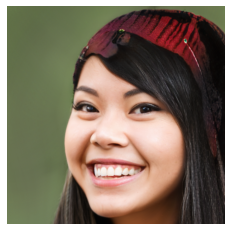

Seed 1001


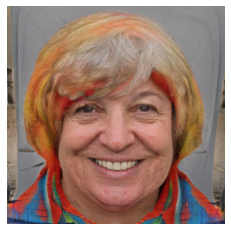

Seed 1002


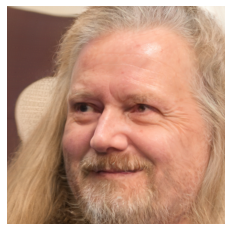

In [ ]:
# Elegimos unas semillas
SEED_FROM = 1000
SEED_TO = 1003

# Generamos imagenes con las semillas
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

## Examinando el vector latente

La figura 7.LVEC muestra los efectos de transformar el vector latente entre dos imágenes. Esta transformación se logra moviendo lentamente un vector latente de valor 512 al otro vector 512. Las imágenes que tienen vectores latentes similares aparecerán de manera similar entre sí. Un punto de gran dimensión entre dos vectores latentes aparecerá similar a los dos vectores latentes de punto final.

**Figure 7.LVEC: Transforming the Latent Vector**
![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_progression.jpg "GAN")

In [ ]:
def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    result.append( rnd.randn(1, vector_size) ) 
  return result

# URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
# "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl" caras

#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl" caras 2

URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/download/1.0.0/fish-gan-2020-12-09.pkl" # peces

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)

vector_size = G.z_dim
# range(8192,8300)
seeds = expand_seed( [8192+1,8192+9], vector_size)
#generate_images(Gs, seeds,truncation_psi=0.5)
print(seeds[0].shape)

Loading networks from "https://github.com/jeffheaton/pretrained-gan-fish/releases/download/1.0.0/fish-gan-2020-12-09.pkl"...
(1, 512)


El siguiente código se moverá entre las semillas proporcionadas. La constante PASOS especifica cuántos fotogramas debe haber entre cada una de las semillas.

In [ ]:
# Elija las semillas para transformar y la cantidad de pasos a seguir para llegar a cada una.

SEEDS = [6624,6618,6616] # Better for fish
#SEEDS = [1000,1003,1001] # Better for faces
STEPS = 100

# Eliminar cualquier resultado anterior
!rm /content/results/* 

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

# Genere las imágenes para el video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(G, SEEDS[i])
  v2 = seed2vec(G, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
    current = current + step
    img = generate_image(device, G, current)
    img.save(f'./results/frame-{idx}.png')
    idx+=1
 
# Vincula las imágenes en un video.
!ffmpeg -r 30 -i /content/results/frame-%d.png -vcodec mpeg4 -y movie.mp4

Seed 6624:   0%|          | 0/100 [00:00<?, ?it/s]

Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


Seed 6618:   0%|          | 0/100 [00:00<?, ?it/s]

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Download video.

In [ ]:
from google.colab import files
files.download('movie.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>